# Hands-on 3: Polynomial Regression: Understanding the Process
**Alumno:** Montes Medina Carlos ALberto  
**Materia:** Inteligencia Artificial  
**Fecha:** (11/10/2025)

*Introducción*

*La regresión polinómica*

es una extensión de la regresión lineal que permite ajustar
relaciones no lineales entre variables. En lugar de usar una línea recta, utiliza
una curva polinómica que puede adaptarse mejor a datos que no siguen una tendencia lineal.

Ecuación general:

y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε

Es útil cuando los datos tienen una forma curva y la regresión lineal simple no logra
representar correctamente la relación entre las variables. Este notebook implementa
la regresión polinómica paso a paso usando Python y scikit-learn.

# Preprocesamiento
### Pasos para hacer una Regresion Polinomial en Python
- Importar las librerias necesarias para el analisis
- Cargar los DataSets
- Hacer una particion en los datos (una para el entrenamiento y otra para probarlo)
- Definir el grado y usar la particion de los datos para entrenar y probar el modelo
- Evaluar el modelo polinomial con los valores:
  - Error cuadratico medio
  - R cuadradada
- Finalmente hacer una graficación para mostrar los resultados

In [12]:
# ----------------------------------------------------------
# Paso 1: Importar librerías para operaciones matematicas, graficación de datos, obtener modelo y entrenarlo
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')      # Para ocultar advertencias innecesarias

***Preparacion de los datos para este NoteBook sobre regresion polinomial***

X Representa la variable independiente y es un arreglo de 0 hasta 39

Y representa la variable independiente y son valores entre 1 y 201

In [13]:
# ----------------------------------------------------------
# Paso 2: Preparar los datos (datos de Hassane Skikri)
# ----------------------------------------------------------
# Datos originales: X representa la variable independiente y y la dependiente
X = np.arange(0, 40)  # Valores de X desde 0 hasta 39
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88,
     90, 92, 95, 100, 108, 135, 151, 160, 169, 172, 173, 176, 175, 175, 176, 178, 179, 180, 190, 201]


***Graficación previa para comprender los datos***

Usando la lbreria de MatPlotLib haremos un grafico de dispersión usando los valores de "x" y "y" como pares ordenados de un punto cartesiano

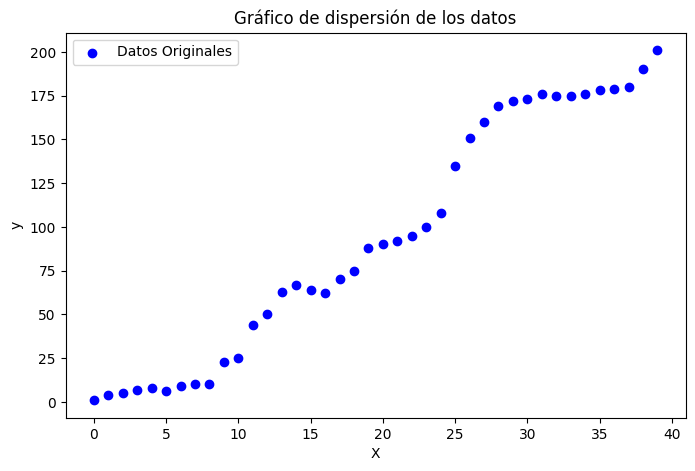

In [14]:
# Graficar los datos originales para observar la relación
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gráfico de dispersión de los datos')
plt.legend()
plt.show()



# Feature Engineering
### Hacer la particion
* Se usa la funcion train_test_split()
  - x: son las columnas del DataSet que describen las casas (MedInc, HouseAge, AveRoom, etc...) en este caso solo se toma el ingreso Promedio "MedInc"
  - y: es el valor real de los datos
  - test_size: Del nuestros datos de x (un arreglo del 0 al 39) tomara un porcentaje de ellos y su valor correspondiente de y para hacer Machine Learning, en este caso el test_size = 0.2 lo que significa que el 20% será para probar el modelo y el 80% restante será para entrenarlo
  - random_state: es un número semilla que funciona como divisor y es muy común en ejercicios de machine learning, aparte de ser un chiste que hace referencia al libro “Guía del Autoestopista Galáctico" donde el número 42 es la respuesta al sentido de la vida

In [15]:
# ----------------------------------------------------------
# Paso 3: Dividir los datos en entrenamiento y prueba
# ----------------------------------------------------------
# Usamos 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### PipeLine
En scikit-learn permite encadenar varios pasos de procesamiento y modelado en un solo flujo.

El Pipeline facilita el entrenamiento, ya que combina la transformación y el modelo en un solo objeto (pipeline.fit() entrenará ambas partes automáticamente).

In [16]:
# ----------------------------------------------------------
# Paso 4: Configurar un Pipeline de regresión polinómica
# ----------------------------------------------------------
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Transformación polinómica
    ('linear', LinearRegression())   # Modelo de regresión lineal
])





# Modelo Selection
### Seleccion del grado optimo para la regresion polinomial

Se usan las funciones de GridSearch para buscar cual es el grado de la ecuación polinomica que mejor se adapta a la curva, en este caso es un arreglo del 1 al 4:

Según las funciones de GridSearchCV el mejor grado para el la ecuación es = 3

**¿Porque no usar una recta en lugar de una curva?**

Funciona bien cuando la relación entre X e Y es aproximadamente lineal, pero si los datos tienen curvaturas, puntos de inflexión o aceleración/desaceleración, una recta no puede capturar bien esas variaciones. Se verían errores grandes (residuos altos).

In [17]:
# ----------------------------------------------------------
# Paso 5: Selección del grado óptimo del polinomio con GridSearchCV
# ----------------------------------------------------------
parameters = {'poly__degree': np.arange(1, 5)}
grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1,1), y_train)

best_degree = grid_search.best_params_['poly__degree']
print("El grado óptimo del polinomio es:", best_degree)



El grado óptimo del polinomio es: 3


# Model Training

### Transformacion de los datos segun el grado

las funciones fit_transform() y transform() son para ajustar dependiendo del grado de la ecuación todas las combinaciones de la variable independiente.

y=b0​+b_1​X1+b_2​X^2+b3​_X^3

Para esta data tendremos una matriz de 4 columnas explicadas con la formula anterior y 40 filas, una fila por cada valor de X

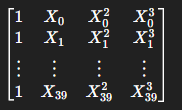

In [18]:
# ----------------------------------------------------------
# Paso 6: Transformar los datos según el mejor grado
# ----------------------------------------------------------
poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))


Para "entrenar" el modelo se resuelve un sistema matricial para calcular las betas

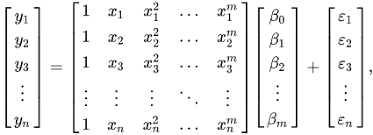

In [19]:
# ----------------------------------------------------------
# Paso 7: Entrenar el modelo final
# ----------------------------------------------------------
model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)


LinearRegression()

# Prediction

Si "y" es el valor real de los datos

"ŷ" es el valor predicho por el modelo y su formula tiene la siguiente forma:
y^=b0+b_1X+b_2X^2+b_3X^3

B0 es la ordenada al origen (intercepto).

B1 es el coeficiente de la primera potencia de X

B2 es el coeficiente de la segunda potencia de X

B3 es el coeficiente de la tercera potencia de X

X son los valores de tu arreglo, de 0 a 39.

In [20]:
# ----------------------------------------------------------
# Paso 8: Hacer predicciones
# ----------------------------------------------------------
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

#  Model Evaluation

Después de entrenar el modelo y obtener las predicciones (`y_pred_train` y `y_pred_test`),  
se usan métricas estadísticas para medir **qué tan bien el modelo predice los valores reales**.


El valor de MSE siginifica Error promedio en el entrenamiento

El valor de R² significa qué tanto explica el modelo los datos de entrenamiento

In [21]:
# ----------------------------------------------------------
# Paso 9: Evaluar el modelo
# ----------------------------------------------------------
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)

print(f"Error cuadrático medio (train): {train_error:.2f}")
print(f"Error cuadrático medio (test): {test_error:.2f}")
print(f"R^2 (train): {train_r2:.3f}")
print(f"R^2 (test): {test_r2:.3f}")



Error cuadrático medio (train): 82.12
Error cuadrático medio (test): 93.20
R^2 (train): 0.983
R^2 (test): 0.972


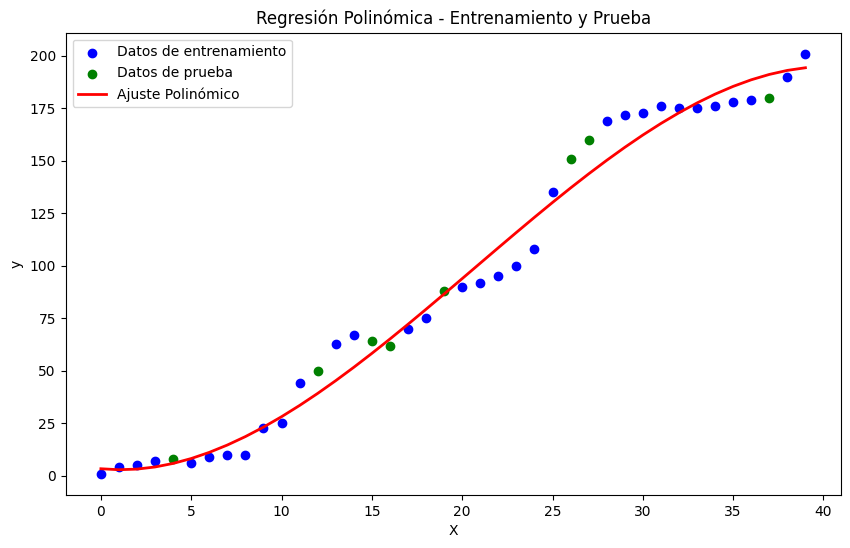

In [22]:
# ----------------------------------------------------------
# Paso 10: Graficar el ajuste de la regresión polinómica
# ----------------------------------------------------------
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')

X_range = np.arange(0, 40).reshape(-1,1)
X_range_poly = poly_best.transform(X_range)
predictions_range = model_best.predict(X_range_poly)

plt.plot(X_range, predictions_range, color='red', linewidth=2, label='Ajuste Polinómico')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Polinómica - Entrenamiento y Prueba')
plt.legend()
plt.show()